Putting it al together with a multi-class classification problem

* Binary Classification = one thing or another (cat vs dog,spam vs not spam,fraud or not fraud)
* Multi-class classification = more than one thing or another ( cat vs dog vs chicken)

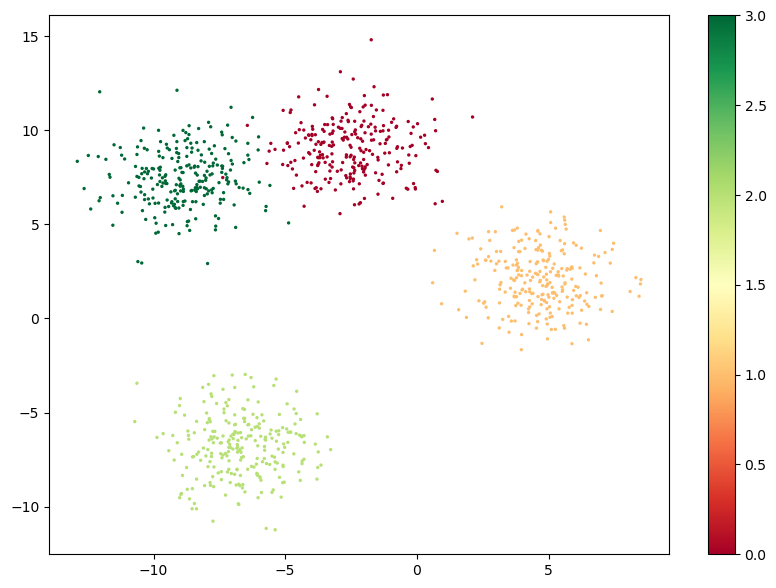

In [25]:
# Creating a toy multiclass dataset
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob,y_blob = make_blobs(n_samples=1000,n_features=NUM_FEATURES,centers=NUM_CLASSES,cluster_std=1.5,random_state=RANDOM_SEED)


# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)


# split into train and test
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)

# Plot data(visualize,visualize,visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlGn,s=2)
plt.colorbar()
plt.show()

### Building a multi-class classification model in PyTorch

In [27]:
# Create device agnostic code
device = "mps" if torch.backends.mps.is_available else "cpu"
device

'mps'

In [ ]:
# Build a multi-class classification
class BlobModel(nn.Module):
    